In [37]:
import yfinance as yf
import matplotlib.pyplot as plt
import altair as alt
import pandas as pd
from datetime import datetime, timedelta



import requests, json, os, warnings, re
import pandas as pd
import datetime


### Long-interval

In [39]:
#define the ticker symbol
tickerSymbol = 'TSLA'

#get data on this ticker
tickerData = yf.Ticker(tickerSymbol)

#get the historical prices for this ticker
tickerDf = tickerData.history(period='1d', start='2020-01-1', end='2020-09-12')

#see your data
tickerDf.tail()


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-09-04,402.81,428.00,372.02,418.32,110321900,0,0.0
2020-09-08,356.00,368.74,329.88,330.21,115465700,0,0.0
2020-09-09,356.60,369.00,341.51,366.28,79465800,0,0.0
2020-09-10,386.21,398.99,360.56,371.34,84186800,0,0.0
2020-09-11,386.21,382.50,361.30,370.71,34016428,0,0.0


In [2]:
tickerData.calendar

,0,1
Earnings Date,2020-10-21 00:00:00,2020-10-26 00:00:00
Earnings Average,0.53,0.53
Earnings Low,0.22,0.22
Earnings High,0.91,0.91
Revenue Average,8066680000,8066680000
Revenue Low,6681000000,6681000000
Revenue High,9005300000,9005300000


In [3]:
tickerData.recommendations

,Firm,To Grade,From Grade,Action
Date,,,,
2012-02-16 07:42:00,JP Morgan,Overweight,,main
2012-02-16 13:53:00,Wunderlich,Hold,,down
2012-02-17 06:17:00,Oxen Group,Buy,,init
2012-03-26 07:31:00,Wunderlich,Buy,,up
2012-05-22 05:57:00,Maxim Group,Buy,,init
...,...,...,...,...
2020-08-31 16:21:38,Argus Research,Buy,,main
2020-09-01 15:57:05,RBC Capital,Underperform,,main
2020-09-02 12:47:13,Bank of America,Neutral,,reit


In [4]:
priceData = tickerDf.Open


In [5]:
priceData = priceData.asfreq(pd.infer_freq(priceData.index))


In [6]:
priceData 

Date
2020-01-02     84.90
2020-01-03     88.10
2020-01-04       NaN
2020-01-05       NaN
2020-01-06     88.09
               ...  
2020-09-07       NaN
2020-09-08    356.00
2020-09-09    356.60
2020-09-10    386.21
2020-09-11    386.21
Freq: D, Name: Open, Length: 254, dtype: float64

Text(0.5, 1.0, 'TSLA Price Data')

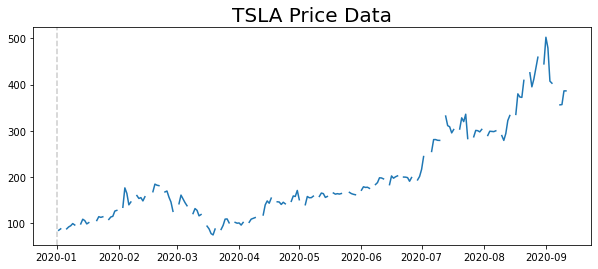

In [7]:
plt.figure(figsize=(10,4))
plt.plot(priceData)
for year in range(priceData.index[0].year, priceData.index[-1].year+1):
    plt.axvline(datetime(year,1,1), color='k', linestyle='--', alpha=0.2)
plt.title("%s Price Data"%tickerSymbol, fontsize=20)

### Short-interval

In [8]:
from datetime import datetime
from alpha_realtime_stock import AlphaRealtimeStock
import time
import timeit
import requests
from bs4 import BeautifulSoup
import re

def get_crumbs():
    """
    get crumb  from yahoo finance
    returns crumb
    """
    url = 'https://finance.yahoo.com/quote'
    header = {'Connection': 'keep-alive',
              'Expires': '-1',
              'Upgrade-Insecure-Requests': '1',
              'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_4) \
               AppleWebKit/537.36 (KHTML, like Gecko) Chrome/81.0.4044.138 Safari/537.36'
              }

    website = requests.get(url, headers=header)
    soup = BeautifulSoup(website.text, 'lxml')
    crumb = re.findall('"CrumbStore":{"crumb":"(.+?)"}', str(soup))
    return crumb[0]

crumb = get_crumbs()
ticker_list = ['TSLA']
stock_collection = {}
for ticker in ticker_list:
    stock = AlphaRealtimeStock(ticker, crumb)
    stock_collection[ticker] = stock
# while True:
#     print(datetime.now().strftime("%H:%M:%S"))
    for ticker in ticker_list:
        stock = stock_collection[ticker]
        stock.fetch_webdata()
#         df = stock.get_Stoch_RSI_Indicator()
#         print(df.tail())
#     end = timeit.default_timer()
#     time.sleep(5)

In [12]:
stock.fetch_webdata().tail()

,Datetime,Open,High,Low,Close,Volume
564,2020-09-11 09:50:00,374.019989,374.429993,372.200012,372.468994,446751
565,2020-09-11 09:55:00,372.575012,375.000000,371.130005,371.350006,670897
566,2020-09-11 10:00:00,371.519897,372.730011,369.570007,372.394989,603616
567,2020-09-11 10:05:00,372.170013,372.679993,371.160095,372.153015,170576
568,2020-09-11 10:07:51,372.790009,372.790009,372.790009,372.790009,0


#### Using API

In [21]:
params={}

params['function']='TIME_SERIES_INTRADAY'
params['symbol']='TSLA'
params['interval']='5min'
params

{'function': 'TIME_SERIES_INTRADAY', 'symbol': 'TSLA', 'interval': '5min'}

In [30]:
def data_request(params):
    url = "https://www.alphavantage.co/query"
    params['apikey'] = os.environ['ALPHA_PAT']

    return requests.get(url, params)

In [66]:
def data_request(params):
    url = "https://www.alphavantage.co/query"
    params['apikey'] = os.environ['ALPHA_PAT']

    return requests.get(url, params)
                        
def Get_TimeSeries(stock, period):
    """
    A wrapper function to obtain the the time series of a the desired stock from the Alpha Vantage API.
    
    Parameters:
    -----------
    stock: the desired stock symbol (e.g., "GOOG", "AMD", "FB", "INTC").
    period: "daily", "weekly", "monthly"
    
    Returns:
    --------
    A pandas dataframe with the columns `open`, `high`, `low`, `close`, and `volume`.
    """
    
    # Process here the parameter `period`
    # which affects the function parameter in the API
    
    # TODO

    params={}
    if period=='daily':
        params['function'] = 'TIME_SERIES_DAILY'
        series='Time Series (Daily)'
    elif period=='weekly':
         params['function'] = 'TIME_SERIES_WEEKLY'
         series='Weekly Time Series'
    elif period=='monthly':
         params['function'] = 'TIME_SERIES_MONTHLY'
         series='Monthly Time Series'
    
 
    
    # Now let's create a dictionary to hold the parameters of 
    # our request.
    
    # TODO
    params['symbol'] = stock

    # Requesting the data
    
    # TODO
    r=data_request(params) 
    
    # Check if the request was successful, if not raise an
    # exception
    
    # TODO
        
    
    
    # Create the pandas dataframe (see: pd.read_json() )
    
    # TODO
    json = r.json()
   
    data = pd.DataFrame.from_dict(json[series], orient="index")
    data=data.reset_index()
    data=data.rename(columns={"index": "date", "1. open": "Open","2. high": "High","3. low": "Low","4. close":"Close","5. volume":"Volume"})

    data.stock= json['Meta Data']['2. Symbol']
    


    
    return data

In [67]:
stock_data=Get_TimeSeries('TSLA', 'daily')
stock_data

,date,Open,High,Low,Close,Volume
0,2020-09-10,386.2100,398.9900,360.5600,371.3400,84930608
1,2020-09-09,356.6000,369.0000,341.5100,366.2800,79465769
2,2020-09-08,356.0000,368.7400,329.8800,330.2100,115465691
3,2020-09-04,402.8100,428.0000,372.0201,418.3200,110321885
4,2020-09-03,407.2300,431.8000,402.0000,407.0000,87596086
...,...,...,...,...,...,...
95,2020-04-27,737.6100,799.4900,735.0000,798.7500,20681400
96,2020-04-24,710.8100,730.7300,698.1800,725.1500,13237600
97,2020-04-23,727.6000,734.0000,703.1300,705.6300,13236700
98,2020-04-22,703.9800,734.0000,688.7100,732.1100,14224800


In [68]:
def Plot_TimeSeries(data):
    
    title_price='Stock price of '+data.stock
    title_volume= 'Volume of '+data.stock
    stock_color = alt.condition("datum.open <= datum.close",
                                     alt.value("#06982d"),
                                     alt.value("#ae1325"))
    
    base = alt.Chart(data,title=title_price).encode(
        alt.X('date:T',
              axis=alt.Axis(
                  title='Date'
              )
        ),
        color=stock_color
    )

    rule = base.mark_rule().encode(
        alt.Y(
            'Low:Q',
            title='Price',
            scale=alt.Scale(zero=False),
        ),
        alt.Y2('High:Q')
    )

    bar = base.mark_bar().encode(
        alt.Y('Open:Q'),
        alt.Y2('Close:Q')
    )
    price_plot=rule + bar
    volume_plot=alt.Chart(data,title=title_volume).mark_bar().encode(
        alt.X('date:T',
              axis=alt.Axis(
                  title='Date'
              )),
        alt.Y('Volume:Q')
   ).properties(height=100)
    
    return(price_plot & volume_plot)

In [72]:
Plot_TimeSeries(stock_data)

alt.VConcatChart(...)

### Modeling

In [73]:
tesla_stocks = stock_data

In [74]:
data_to_use = tesla_stocks['Close'].values
data_to_use

array(['371.3400', '366.2800', '330.2100', '418.3200', '407.0000',
       '447.3700', '475.0500', '498.3200', '2213.4000', '2238.7500',
       '2153.1700', '2023.3400', '2014.2000', '2049.9800', '2001.8300',
       '1878.5300', '1887.0900', '1835.6400', '1650.7100', '1621.0000',
       '1554.7600', '1374.3900', '1418.5700', '1452.7100', '1489.5800',
       '1485.0200', '1487.0000', '1485.0000', '1430.7600', '1487.4900',
       '1499.1100', '1476.4900', '1539.6000', '1417.0000', '1513.0700',
       '1592.3300', '1568.3600', '1643.0000', '1500.8400', '1500.6400',
       '1546.0100', '1516.8000', '1497.0600', '1544.6500', '1394.2800',
       '1365.8800', '1389.8600', '1371.5800', '1208.6600', '1119.6300',
       '1079.8100', '1009.3500', '959.7400', '985.9800', '960.8500',
       '1001.7800', '994.3200', '1000.9000', '1003.9600', '991.7900',
       '982.1300', '990.9000', '935.2800', '972.8400', '1025.0500',
       '940.6700', '949.9200', '885.6600', '864.3800', '882.9600',
       '881.56